In [1]:
from numpythia import Pythia, hepmc_write, hepmc_read
from numpythia import STATUS, HAS_END_VERTEX, ABS_PDG_ID

from pyjet import cluster, DTYPE_PTEPM
from pyjet.testdata import get_event

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
DTYPE = np.float64
DTYPE_EP = np.dtype([('E', DTYPE), ('px', DTYPE), ('py', DTYPE), ('pz', DTYPE)])

In [3]:
#Pythia Settings

params = {"Beams:idA" : "11", "Beams:idB" : "-11","Beams:eCM": 91.1876, "WeakSingleBoson:ffbar2gmZ" : "on", "23:onMode": "off", "23:onIfAny": "1 2 3 4 5", "PDF:lepton": "off"}
pythia = Pythia(params =params)

selection = ((STATUS == 1) & ~HAS_END_VERTEX)

In [4]:
array = []
for event in pythia(events=1):
    array = event.all(selection)

In [5]:
from pyjet import cluster
from pyjet import ClusterSequenceArea, JetDefinition, ClusterSequence
sequence = cluster(array, 'ee_kt')
jetdef = JetDefinition('ee_kt')
jets = ClusterSequence(array, jetdef,ep=True)
#areadef = AreaDefinition('active_area')
#area = ClusterSequenceArea(array, jetdef, 'passive',ep=True)

In [6]:
jets = sequence.exclusive_jets_dcut()

In [16]:
cluster = jets[0].constituents_array()

In [17]:
cluster['eta']

array([ 1.45217502,  1.60990705,  2.10830809,  2.3996875 ,  3.44241383,
        3.39160431, 19.90032276,  4.52179426,  3.90660608])

In [9]:
event = np.empty(len(array), dtype=DTYPE_PTEPM)

for p in range(len(array)):
    event['pT'][p] = array['pT'][p]
    event['eta'][p] = array['eta'][p]
    event['phi'][p] = array['phi'][p]
    event['mass'][p] = array['mass'][p]

In [10]:
# define eta and phi ranges and number of bins along each axis
eta_min, eta_max = -4., 4.#np.amin(array['eta']), np.amax(array['eta'])
extent = eta_min, eta_max, -np.pi, np.pi
bins = 200

# create regular grid of ghosts
eta_edges = np.linspace(eta_min, eta_max, bins + 1)
phi_edges = np.linspace(-np.pi, np.pi, bins + 1)
eta = np.linspace(eta_min, eta_max, bins + 1)[:-1] + (eta_max - eta_min) / (2 * bins)
phi = np.linspace(-np.pi, np.pi, bins + 1)[:-1] + (np.pi / bins)
X, Y = np.meshgrid(eta, phi)
ghosts = np.zeros(eta.shape[0] * phi.shape[0], dtype=DTYPE_PTEPM)
ghosts['pT'] = 1e-8
ghosts['eta'] = X.ravel()
ghosts['phi'] = Y.ravel()

# add ghosts to the event
#event = np.concatenate([event, ghosts], axis=0)

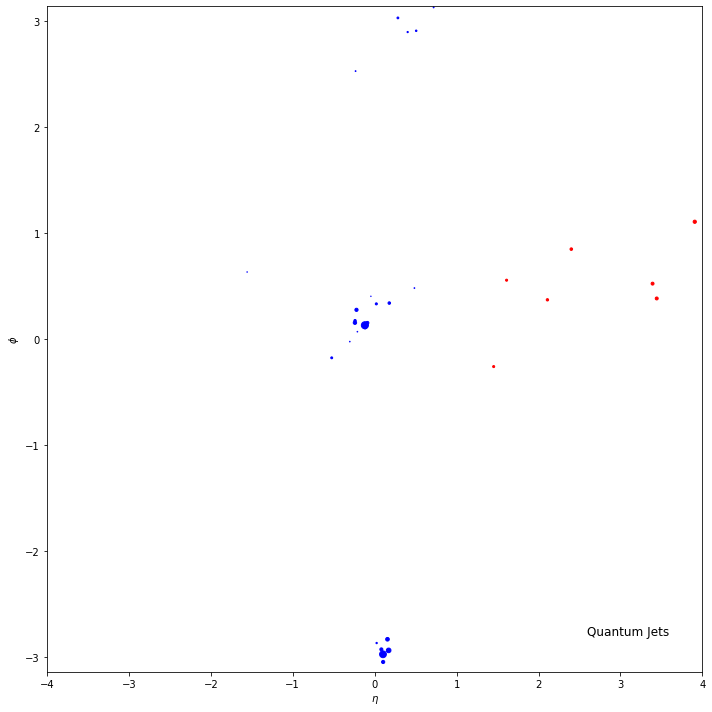

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = None

#pick a different color for each jet
colors = cm.rainbow(np.linspace(0,1,2))
cmap = LinearSegmentedColormap.from_list('cmap', colors, len(colors))
ax = fig.add_subplot(1,1,1, sharey=ax)
#area = np.zeros((eta_edges.shape[0] - 1, phi_edges.shape[0] - 1),dtype=np.float64)

#jetarea, _, _ = np.histogram2d(jet_particles['eta'], jet_particles['phi'], bins = (eta_edges, phi_edges))
#area += 1 

#ax.imshow(np.ma.masked_where(area == 0, area).T, cmap=cmap, extent=extent, aspect=(eta_max-eta_min) / (2*np.pi), interpolation='none', origin='lower')

 # overlay original event
#ax.scatter(array['eta'], array['phi'],s=0 * array['pT'] / array['pT'].max())
ax.scatter(array['eta'], array['phi'],s=50 * array['pT'] / array['pT'].max(), c='b')
ax.scatter(cluster['eta'], cluster['phi'],s=50 * cluster['pT'] / array['pT'].max(), c='r')

ax.set_xlim(extent[:2])
ax.set_ylim(extent[2:])
ax.set_ylabel(r'$\phi$')
ax.set_xlabel(r'$\eta$')
ax.text(0.95, 0.05, 'Quantum Jets',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        fontsize=12)

fig.subplots_adjust(hspace=0)
plt.setp([a.get_yticklabels() for a in fig.axes[1:]], visible=False)
fig.tight_layout()

2
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


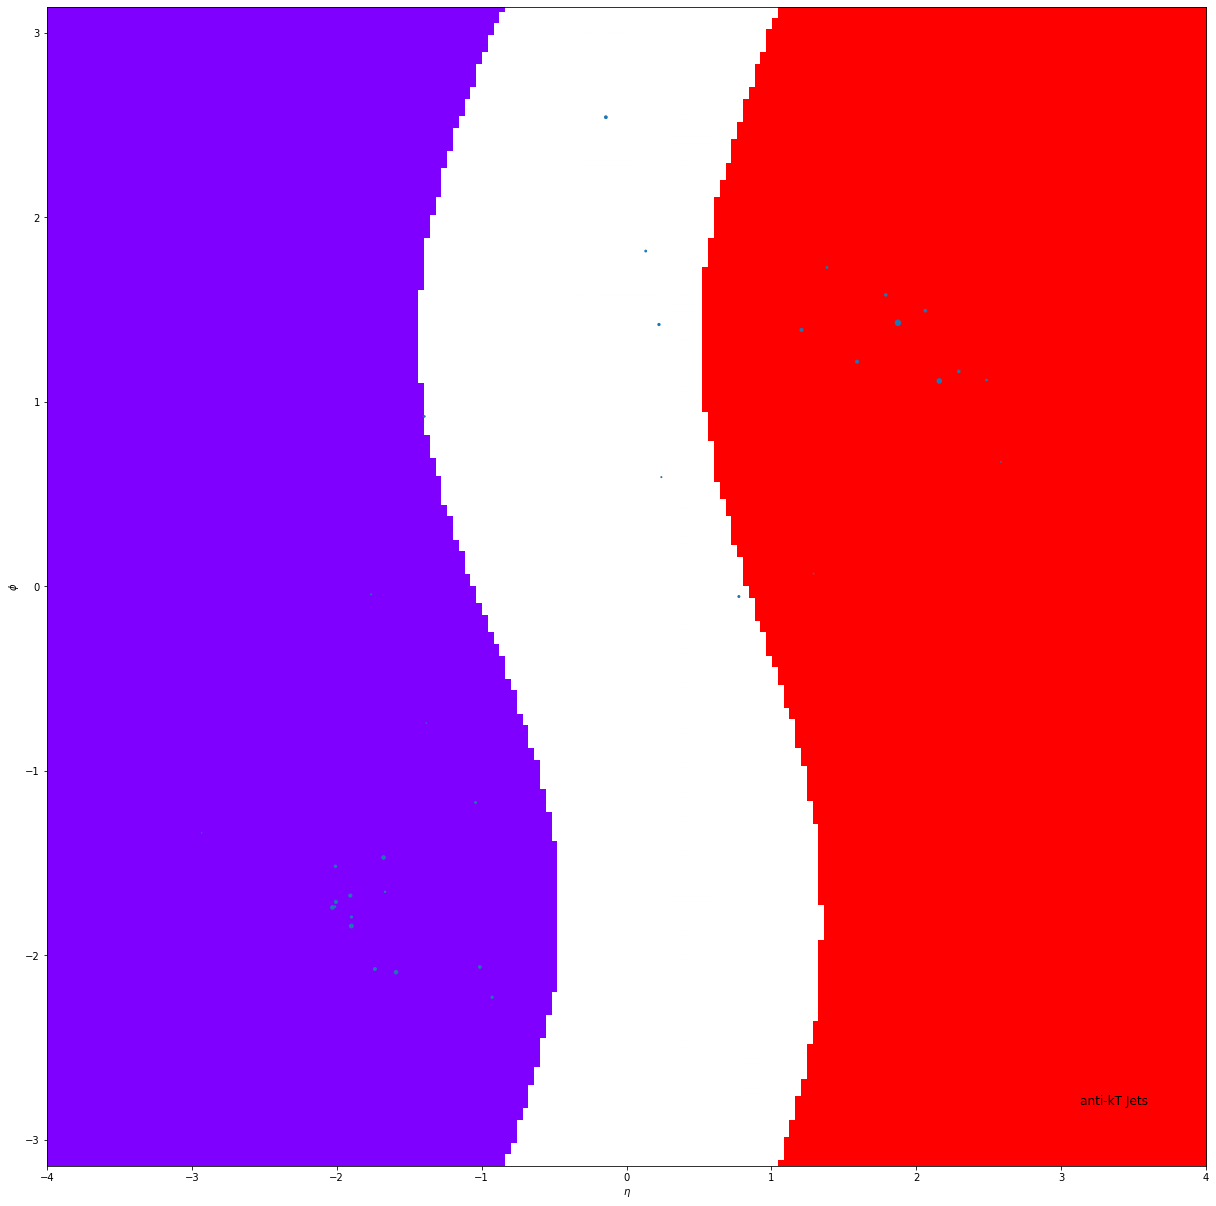

In [43]:
fig = plt.figure(figsize=(50, 50))

ax = None

#event_seq = cluster(event, 'ee_kt')
#temp_jets = event_seq.exclusive_jets(3)

#event_seq = cluster(event, R=0.5, p=-1)
#algo = JetDefinition('ee_genkt', R=np.pi/4, p=-1)
event_seq = cluster(event, algo)
temp_jets = event_seq.inclusive_jets(ptmin=5.0)
print(len(temp_jets))

# pick a different color for each jet
colors = cm.rainbow(np.linspace(0, 1, len(temp_jets)))
#print(colors)
cmap = LinearSegmentedColormap.from_list('cmap', colors, len(colors))
ax = fig.add_subplot(1, 3, 2, sharey=ax)
area = np.zeros((eta_edges.shape[0] - 1, phi_edges.shape[0] - 1),
                    dtype=np.float64)
for ijet, jet in enumerate(temp_jets):
    constit = jet.constituents_array()
    jetarea, _, _ = np.histogram2d(constit['eta'], constit['phi'],
                                       bins=(eta_edges, phi_edges))
    print(jetarea)
    area += (jetarea > 0) * (ijet + 1)
    print(area)

    # plot all areas
#ax.imshow(np.ma.masked_where(area == 0, area).T, cmap=cmap,
              extent=extent, aspect=(eta_max - eta_min) / (2*np.pi),
              interpolation='none', origin='lower')

    # overlay original event
ax.scatter(event['eta'], event['phi'],
               s=30 * event['pT'] / event['pT'].max())
ax.set_xlim(extent[:2])
ax.set_ylim(extent[2:])

ax.set_ylabel(r'$\phi$')
ax.set_xlabel(r'$\eta$')

ax.text(0.95, 0.05, 'anti-kT Jets',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        fontsize=12)

fig.subplots_adjust(hspace=0)
plt.setp([a.get_yticklabels() for a in fig.axes[1:]], visible=False)
fig.tight_layout()